# AB Model from spec

## Setup

Package installation

In [ ]:
# !pip3 install seaborn
# !pip3 install python-statemachine
# !pip3 install mesa
# !pip3 install transitions
# !pip3 install scipy
# !pip3 install cufflinks
# !pip3 install graphviz pygraphviz
# !pip3 install graphviz
# !pip3 install transitions[diagrams]
# !pip3 uninstall mesa

Package importation

In [1]:
# imports
import os
import seaborn as sns
from random import choice
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import mesa
from mesa import Agent, Model
from mesa.time import RandomActivation, RandomActivationByType, SimultaneousActivation
from mesa.datacollection import DataCollector
from matplotlib import pyplot as plt, patches
import scipy.stats as ss
import cufflinks as cf
cf.go_offline()
from plotly.offline import iplot
from transitions import Machine
import random
from transitions.extensions import GraphMachine
import graphviz
import timeit
from datetime import datetime
import logging
from collections import Counter
import networkx as nx

# os.environ["PATH"] += os.pathsep + '/Users/ia329/homebrew/bin' # for graphviz

Model component importation

In [2]:
import EV.model_config as cfg
import EV.worker as worker
from EV.agent import EV, ChargeStation
import EV.model as model
from EV.statemachines import EVSM, LSM
from EV.modelquery import get_evs_charge, get_evs_charge_level, get_evs_active, get_evs_queue, get_evs_travel, get_evs_not_idle, get_active_chargestations, get_eod_evs_socs, get_evs_destinations, get_ev_distance_covered

## Model Environment testing

Station config import

In [ ]:
station_config['A-B']['CS_AB_1']
# worker.sum_total_charging_stations(station_config)

In [ ]:
# {'A-B': {'CS_A-B_1': [{'CPID': 'CS_A-B_1_1',
#     'Power': '7',
#     'Distance': '40',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-B_1_2',
#     'Power': '7',
#     'Distance': '40',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-B_1_3',
#     'Power': '60',
#     'Distance': '40',
#     'Price': '10',
#     'Green': '0',
#     'Booking': '0'}],
#   'CS_A-B_2': [{'CPID': 'CS_A-B_2_1',
#     'Power': '7',
#     'Distance': '20',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-B_2_2',
#     'Power': '7',
#     'Distance': '20',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'}],
#   'CS_A-B_3': [{'CPID': 'CS_A-B_3_1',
#     'Power': '7',
#     'Distance': '50',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-B_3_2',
#     'Power': '7',
#     'Distance': '50',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-B_3_3',
#     'Power': '60',
#     'Distance': '50',
#     'Price': '10',
#     'Green': '0',
#     'Booking': '0'}],
#   'CS_A-B_4': [{'CPID': 'CS_A-B_4_1',
#     'Power': '7',
#     'Distance': '10',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-B_4_2',
#     'Power': '7',
#     'Distance': '10',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-B_4_3',
#     'Power': '60',
#     'Distance': '10',
#     'Price': '10',
#     'Green': '0',
#     'Booking': '0'}],
#   'CS_A-B_5': [{'CPID': 'CS_A-B_5_1',
#     'Power': '7',
#     'Distance': '30',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-B_5_2',
#     'Power': '7',
#     'Distance': '30',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-B_5_3',
#     'Power': '7',
#     'Distance': '30',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'}]},
#  'A-C': {'CS_A-C_1': [{'CPID': 'CS_A-C_1_1',
#     'Power': '7',
#     'Distance': '40',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-C_1_2',
#     'Power': '7',
#     'Distance': '40',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'}],
#   'CS_A-C_2': [{'CPID': 'CS_A-C_2_1',
#     'Power': '7',
#     'Distance': '40',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-C_2_2',
#     'Power': '7',
#     'Distance': '40',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'}],
#   'CS_A-C_3': [{'CPID': 'CS_A-C_3_1',
#     'Power': '7',
#     'Distance': '40',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-C_3_2',
#     'Power': '7',
#     'Distance': '40',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'}],
#   'CS_A-C_4': [{'CPID': 'CS_A-C_4_1',
#     'Power': '7',
#     'Distance': '40',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'},
#    {'CPID': 'CS_A-C_4_2',
#     'Power': '7',
#     'Distance': '40',
#     'Price': '6',
#     'Green': '0',
#     'Booking': '0'}]}}


In [ ]:
# worker.get_routes(station_config)                   #works
worker.find_cpid_for_charging_station(station_config, 'CS_A-C_1')                 # doesnt work, anymore due to new structure

In [ ]:
# worker.count_charging_stations('A-B', station_config)



# worker.get_target_charging_stations('A-B', station_config)                   # Works
# worker.sum_total_charging_stations(station_config)                           # Works   
# worker.get_routes(station_config)                                            # Works
# worker.total_route_length(station_config, 'A-B')                             # Works
# worker.cpids_for_route(station_config, 'A-B') # not working

# worker.get_checkpoint_list(station_config, 'A-C')                           # Works
# worker.get_charging_stations_on_route(station_config, 'A-C')                    # Works
# worker.charge_points_on_route(station_config, 'A-B')                    # not working
# worker.get_route_cps(station_config, 'A-B')                              #not working snymore

# worker.find_cpid_for_charging_station(station_config, 'CS_AB_1_1')                    # not works



In [ ]:
a = worker.get_routes(station_config)
print(len(a))  
print(a)

In [ ]:
# worker.get_checkpoint_list(station_config, 'A-B')
# worker.charge_points_on_route('A-B', station_config)
# worker.get_charge_points_per_station('A-B', station_config)

In [ ]:
station_config = worker.read_charging_data(cfg.STATION_PATH +'stations.csv')

In [ ]:
worker.num_stations_per_route(station_config)

In [ ]:
# station_config   

In [ ]:
# worker.get_stations_for_route('A-B', station_config)
# stations = worker.get_stations_for_route('A-B', station_config)
# print(stations)  # Output: ['CS_A-B_1', 'CS_A-B_2', 'CS_A-B_3', 'CS_A-B_4', 'CS_A-B_5']


From input matrix to model params

Approach 2

In [ ]:
station_config = worker.read_charging_stations(cfg.STATION_PATH +'stations.csv')

In [ ]:
route_counts = Counter([station['Route'] for station in station_config])
print(route_counts)

In [ ]:
points_per_station_per_route = {}
for station in station_config:
    key = f"{station['Route']}_{station['Station']}"
    if key not in points_per_station_per_route:
        points_per_station_per_route[key] = []
    points_per_station_per_route[key].append(station['CPID'])
# print(points_per_station_per_route)
print(points_per_station_per_route.keys())

In [ ]:
routes = list(set([station['Route'] for station in station_config]))
print(routes)

In [ ]:
num_routes = len(routes)
print(num_routes)

## Valid Model Environment

Approach 3

In [3]:
station_config = worker.read_csv(cfg.STATION_PATH +'stations.csv')

In [4]:
# station_config = worker.read_charging_data(cfg.STATION_PATH +'stations.csv')
station_config

{'A-B': {'CS_A-B_1': [{'CPID': 'CS_AB_1_1',
    'Power': '7',
    'Distance': '40',
    'Price': '6',
    'Green': '0',
    'Booking': '0'},
   {'CPID': 'CS_AB_1_2',
    'Power': '7',
    'Distance': '40',
    'Price': '6',
    'Green': '0',
    'Booking': '0'},
   {'CPID': 'CS_AB_1_3',
    'Power': '60',
    'Distance': '40',
    'Price': '10',
    'Green': '0',
    'Booking': '0'}],
  'CS_A-B_2': [{'CPID': 'CS_AB_2_1',
    'Power': '7',
    'Distance': '20',
    'Price': '6',
    'Green': '0',
    'Booking': '0'},
   {'CPID': 'CS_AB_2_2',
    'Power': '7',
    'Distance': '20',
    'Price': '6',
    'Green': '0',
    'Booking': '0'}],
  'CS_A-B_3': [{'CPID': 'CS_AB_3_1',
    'Power': '7',
    'Distance': '50',
    'Price': '6',
    'Green': '0',
    'Booking': '0'},
   {'CPID': 'CS_AB_3_2',
    'Power': '7',
    'Distance': '50',
    'Price': '6',
    'Green': '0',
    'Booking': '0'},
   {'CPID': 'CS_AB_3_3',
    'Power': '60',
    'Distance': '50',
    'Price': '10',
    'Green': '

In [ ]:
# get the number of charging stations per route
stations_per_route = {route: len(station_config[route]) for route in station_config}
print(stations_per_route)

In [ ]:
# get the number of charging points per station per route
points_per_station_per_route = {}
for route in station_config:
    for station in station_config[route]:
        num_points = len(station_config[route][station])
        if route not in points_per_station_per_route:
            points_per_station_per_route[route] = {}
        points_per_station_per_route[route][station] = num_points
print(points_per_station_per_route)

In [ ]:
# get a list of all routes
routes = station_config.keys()
print(routes)

In [ ]:
# get the total number of routes
num_routes = len(routes)
print(num_routes)

In [ ]:
# worker.get_charge_points_per_station_on_route(station_config, 'A-B')
cs = worker.count_charge_points_by_station(station_config, 'A-B')                        #works
# type(cs)
# b = cs.values()
# b = list(b)
# type(b)
cs

In [ ]:
# def get_values(d):
#     """
#     Returns a list containing the associated values for each key in the dictionary.
#     """
#     return list(d.values())
# # my_dict = {'a': 1, 'b': 2, 'c': 3}
# # values_list = get_values(my_dict)
# values_list = get_values(cs)
# print(values_list)  # Output: [1, 2, 3]

# # a = worker.count_charge_points_by_station(station_config, 'A-B') 
# # # list = get_values(a) 
# # # list = get_values(a) 
# # print(a)
# # type(a)
# # print(a.keys())
# # b = list(a.keys())
# # print(b)



In [ ]:
# worker.get_checkpoint_list(station_config, 'A-C')                           #  not work
a = worker.get_charging_stations_on_route(station_config, 'A-B') 
print(a)

In [ ]:
cs = worker.get_route_from_config('A-C', station_config)  
# print(cs.keys())
print(cs)

In [ ]:
def cumulative_cs_distances(numbers):
    result = []
    for i in range(len(numbers)):
        if i == 0:
            result.append(numbers[i])
        else:
            result.append(numbers[i] + result[i-1])
    return result

def get_values(d):
    """
    Returns a list containing the associated values for each key in the dictionary.
    """
    return list(d.values())


In [ ]:
# worker.get_cumulative_distances('A-B', station_config)
list = ['a', 'b', 'c', 'd', 'e']

In [ ]:
a = worker.remove_list_item_seq(list)
print(a)
b = worker.remove_list_item_seq(list)
print(b)
c = worker.remove_list_item_seq(list)
print(c)
d = worker.remove_list_item_seq(list)
print(d)
e = worker.remove_list_item_seq(list)
print(e)
print(len(list))

In [ ]:
class MyListClass:
    def __init__(self, n, string_list):
        """
        # This function creates an ’n’ number of class attributes named as each string in the list, and initialised as empty lists.
        """
        for s in string_list:
            setattr(self, s, [])
            for i in range(n):
                getattr(self, s).append(None)

                


In [ ]:
my_obj = MyListClass(5, ['foo', 'bar', 'baz'])
print(my_obj.foo)
# [None, None, None, None, None]

my_obj.foo[0] = 42
print(my_obj.foo)
# [42, None, None, None, None]

my_obj.bar.append('hello')
print(my_obj.bar)
# [None, None, None, None, None, 'hello']


In [ ]:
def select_route_as_key(input):
    """
    This function returns one of the keys in input dictionary, up to the integer value of the key
    """
    # calculate the sum of values in the input dictionary
    n = sum(input.values())
    
    # create a dictionary to keep track of the number of times each key is returned
    counter = {key: 0 for key in input}
    
    # select a key and return it as a string
    def helper():
        for key in input:
            if counter[key] < input[key]:
                counter[key] += 1
                return str(key)
        # if all keys have been returned the maximum number of times, raise an exception
        raise Exception('no more route assignments')
    
    # keep track of the number of times the function has been run
    num_runs = 0
    
    # run the function at most n times
    while num_runs < n:
        try:
            key = helper()
            num_runs += 1
            yield key
        except Exception as e:
            yield str(e)
            return


In [ ]:
input_dict = {'key1': 4, 'key2': 1, 'key3': 1}
for key in select_route_as_key(input_dict):
    print(key)

In [ ]:
def get_charging_stations_along_route(station_config, route_name):
    """
    Returns a dictionary of charging stations along the route. 
    The key is the station name and the value is the distance from the start of the route.   
    """
    charging_stations = {}
    route_stations = station_config.get(route_name)
    if route_stations:
        for station_name, station_data in route_stations.items():
            for station in station_data:
                charging_stations[station_name] = int(station['Distance'])
    return charging_stations


In [ ]:
# a = get_charging_stations_along_route(station_config, 'A-B')
# print(a)
b = worker.get_dict_values(worker.get_charging_stations_along_route(station_config, 'A-B'))
print(b)
c = worker.cumulative_cs_distances(b)
print(c)


In [ ]:

def get_power_values(station_config, route_name):
    """Returns a list of all distance values, for every CP on a given route."""
    distance_values = []
    for station in station_config[route_name]:
        for charger in station_config[route_name][station]:
            distance_values.append(int(charger['Power']))
    return distance_values

In [ ]:
a = get_power_values(station_config, 'A-B')
print(a)

In [ ]:
def get_power_values(station_config, route_name):
    """Returns a dict with Charge station name as key and list of power values for each charge point in the station."""
    power_dict = {}
    for station in station_config[route_name]:
        cp_power = []
        for charger in station_config[route_name][station]:
            cp_power.append(int(charger['Power']))
        power_dict[station] = cp_power
    return power_dict


In [ ]:
a = get_power_values(station_config, 'A-B')
print(a)

In [ ]:
def get_string_after_hyphen(string):
    """
    Given a string that contains a hyphen, returns the part of the string after the hyphen.
    If the string does not contain a hyphen, returns an empty string.
    """
    if '-' in string:
        return string.split('-')[1]
    else:
        return ''


In [ ]:
a = get_string_after_hyphen('Lagos-Abuja')
print(a)

Model parameters

In [ ]:
class Object(object):
    def __init__(self):
        self.post_1 = 0
        self.post_2 = 3
        self.post_3 = 9
        self.points = [20,40,60]

def get_value_by_index(obj, index):
    post_attrs = sorted([key for key in vars(obj) if key.startswith('post_')], key=lambda x: int(x.split('_')[1]))
    post_key = post_attrs[index-1]
    post_value = getattr(obj, post_key)
    points_value = obj.points[index-1]
    return post_value * points_value



In [ ]:
obj = Object()
value = get_value_by_index(obj, 3) # returns 540
print(value)

In [ ]:
# 365 days = 8760 hours, 30 days = 720 hours, 2 days = 48 hours, 7 days = 168 hours
ticks = 48
no_evs = 2

In [ ]:
def reverse_strings(string_list):
    reversed_list = []
    for string in string_list:
        reversed_list.append(string[::-1])
    return reversed_list

In [ ]:
a = ['A-B', 'B-C', 'A-C']
b = worker.reverse_strings(a)
for i in b:
    a.append(i)
print(a)

In [ ]:
def get_possible_journeys(current_location, permutation):
    cities = ['A', 'B', 'C', 'D']
    journeys = []
    
    for p in permutation:
        if p == current_location:
            continue
        elif p in cities:
            journeys.append(current_location + '-' + p)
        else:
            for c in cities:
                if c != current_location:
                    journeys.append(current_location + '-' + c + '-' + p)
    
    return journeys

def get_possible_destinations(current_position):
    cities = ['A', 'B', 'C', 'D']
    destinations = []
    
    for city in cities:
        if city == current_position:
            continue
        else:
            destinations.append(city)
    
    return destinations

def get_possible_journeys_long(current_position):
    cities = ['A', 'B', 'C', 'D']
    journeys = []
    
    for city in cities:
        if city == current_position:
            continue
        else:
            journeys.append(current_position + '-' + city)
    
    return journeys



In [ ]:
# get_possible_journeys('A', 'B')
get_possible_destinations('A')
# get_possible_journeys_long('D')

NetworkX

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.animation as animation
import matplotlib
import numpy as np

matplotlib.use('TkAgg')
plt.ion()

H = nx.octahedral_graph()  # generate a random graph
pos = nx.spring_layout(H, iterations=200)  # find good positions for nodes

Please write a function which accepts a string in the form 'A-B' and returns an integer value.

Imagine a grid. A is a point in the top left corner, B is a point in the top right corner, C is in the lower left corner and D is in the lower right corner.

To move from A to B, one would go right, if going from A to C, one would go down. If going from D to C, one would go left.
If going from C to B, the direction would be diagonal - to the right and upwards and a trip from D to A would be diagonal - to the left and upwards.

The returned integer value will be 1 if the direction to move in is up, 2 if the direction is right, 3 if it is downwards or 4 if the way to go is left. 
If the direction is diagonal - right and upwards, the return value will be 5.
If the direction is diagonal - left and upwards, the return value will be 6.
If the direction is diagonal - right and downwards, the return value will be 7.
If the direction is diagonal - left and downwards, the return value will be 8.


If the string argument to the function is 'A-B' this means the source is A, the destination is B and so, the return value will be 2. If the argument is 'B-D', the return value would be 3. If the input argument is 'B-C', the return value would be 8.

In [32]:
def get_direction(s):
    """Gets the direction of the EV based on the route.
    """
    # Extract the source and destination points from the input string
    src, dest = s.split('-')
    # Define a dictionary to map each point to its row and column in the grid
    point_map = {'A': (0, 0), 'B': (0, 1), 'C': (1, 0), 'D': (1, 1)}
    # Get the row and column numbers for the source and destination points
    src_row, src_col = point_map[src]
    dest_row, dest_col = point_map[dest]
    # Calculate the row and column differences between the source and destination points
    row_diff = dest_row - src_row
    col_diff = dest_col - src_col
    # Determine the direction based on the row and column differences
    if row_diff == -1 and col_diff == 0:
        return 1  # up
    elif row_diff == 0 and col_diff == 1:
        return 2  # right
    elif row_diff == 1 and col_diff == 0:
        return 3  # down
    elif row_diff == 0 and col_diff == -1:
        return 4  # left
    elif row_diff == -1 and col_diff == 1:
        return 5  # diagonal - right and up
    elif row_diff == -1 and col_diff == -1:
        return 6  # diagonal - left and up
    elif row_diff == 1 and col_diff == 1:
        return 7  # diagonal - right and down
    elif row_diff == 1 and col_diff == -1:
        return 8  # diagonal - left and down
    else:
        raise ValueError('Invalid input: {}'.format(s))

In [34]:
get_direction('B-C')

8

In [ ]:
# nodes = list(range(100))

# df = pd.DataFrame({'from': np.random.choice(nodes, 100),
#                    'to': np.random.choice(nodes,100)
#                   })

nodes = ['A', 'B', 'C', 'D']

df = pd.DataFrame({'from': np.random.choice(nodes, len(nodes)),
                   'to': np.random.choice(nodes,len(nodes))
                  })

In [ ]:
for i in range(len(nodes)):
    df['from'][i] = nodes[i]
    df['to'][i] = nodes[i]
# get_possible_destinations('A')

In [ ]:
df

In [ ]:
G = nx.from_pandas_edgelist(df, source='from', target='to')

In [ ]:
nx.draw(G);

In [ ]:
plt.hist([v for k,v in nx.degree(G)]);

In [24]:
import networkx as nx

def create_charging_network(station_config):
    G = nx.Graph()

    # Add city nodes to graph
    cities = set()
    for route, config in station_config.items():
        cities.update([route.split('-')[0], route.split('-')[1]])
    for city in cities:
        G.add_node(city, node_type='city')

    # Add charging station nodes and edges to graph
    for route, config in station_config.items():
        start_city = route.split('-')[0]
        end_city = route.split('-')[1]

        # Add start and end city nodes to graph
        G.add_edge(start_city, end_city, edge_type='route')

        # Add charging station nodes to graph
        for station_id in config:
            G.add_node(station_id, node_type='station')
            G.add_edge(start_city, station_id)
            G.add_edge(station_id, end_city)

    return G


In [25]:
G = create_charging_network(station_config)

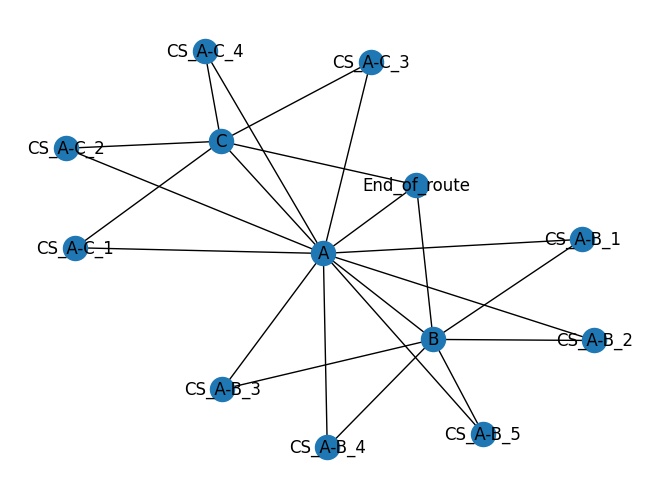

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# assume the returned graph object is stored in variable G
nx.draw(G, with_labels=True)
plt.show()


Run Model

In [ ]:
# model_run = model.EVModel(ticks=ticks, no_evs=no_evs, no_css=no_css, no_cps=no_cps)
# for i in range(ticks):
#     model_run.step()

# # last stable
# model_run = model.EVModel(ticks=ticks, no_evs=no_evs, params=params)
# for i in range(ticks):
#     model_run.step()

model_run = model.EVModel(ticks=ticks, no_evs=no_evs, params=station_config)
for i in range(ticks):
    model_run.step()

In [ ]:
# model_run.schedule.agents
run_stats = model_run.datacollector.get_model_vars_dataframe()
print(run_stats)

Export results to CSV file

In [ ]:
# today's date as string
date_str = str(datetime.today())
# export csv
model_run.datacollector.get_model_vars_dataframe().to_csv(cfg.DATA_PATH + 'data_' + date_str[0:10] + '_' + str(no_evs) + '_EV_agent_model_output.csv')

In [ ]:
# location,x,y
# A-B_1,10,60
# A-C_1,20,30
# A-C_2,20,45
# A-D_1,30,50
# A-D_2,45,65

Try 3 - unimplemented

In this implementation, the move method first determines the position of the next ChargeStation agent in the route, and then moves the EV agent towards that position one step at a time. At each step, the method checks if there is a ChargeStation agent at the new position, and if there is one, it runs the drop_by method to append the ChargeStation agent to the chosen_station attribute of the EV agent.

Note that the move method assumes that the pos attribute of the EV agent is a tuple of coordinates, and that the positions of the Location and ChargeStation agents are also tuples of coordinates. The method also assumes that the grid used in the model is a MultiGrid object. If any of these assumptions are not true in your implementation, you may need to modify the code accordingly.

In [ ]:
from mesa import Agent
from mesa.space import MultiGrid
import random

class EV(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.pos = self._random_location()
        self.route = self._choose_route()
        self.chosen_station = None
    
    def _random_location(self):
        # Choose a random location from the Location agents
        location_agents = [agent for agent in self.model.schedule.agents if isinstance(agent, Location)]
        location_agent = random.choice(location_agents)
        return location_agent.pos
    
    def _choose_route(self):
        # Choose a random route that contains the ChargeStation agents
        charge_station_agents = [agent for agent in self.model.schedule.agents if isinstance(agent, ChargeStation)]
        route = []
        current_position = self.pos
        while len(charge_station_agents) > 0:
            # Find the closest ChargeStation agent to the current position
            closest_station = min(charge_station_agents, key=lambda x: self.distance(current_position, x.pos))
            # Add the closest ChargeStation agent to the route
            route.append(closest_station)
            # Remove the closest ChargeStation agent from the list of available ChargeStation agents
            charge_station_agents.remove(closest_station)
            current_position = closest_station.pos
        return route
    
    def _distance(self, pos1, pos2):
        # Calculate the Euclidean distance between two positions
        return ((pos1[0]-pos2[0])**2 + (pos1[1]-pos2[1])**2)**0.5
    
    def _move(self):
        # Move towards the position of the next ChargeStation agent in the route
        if len(self.route) > 0:
            next_station = self.route[0]
            dx = next_station.pos[0] - self.pos[0]
            dy = next_station.pos[1] - self.pos[1]
            if abs(dx) > abs(dy):
                self.pos = (self.pos[0] + dx//abs(dx), self.pos[1])
            else:
                self.pos = (self.pos[0], self.pos[1] + dy//abs(dy))
            # Check if there is a ChargeStation agent at the new position
            cellmates = self.model.grid.get_cell_list_contents([self.pos])
            for agent in cellmates:
                if isinstance(agent, ChargeStation):
                    self._drop_by(agent)
                    break
    
    def _drop_by(self, station):
        # Append the chosen ChargeStation agent to the chosen_station attribute
        self.chosen_station = station


In [ ]:
class EV:
    def __init__(self, pos):
        self.pos = pos
        self._coord = None
        
    def move(self, model):
        # Calculate the unit vector towards the destination
        dx = self._coord[0] - self.pos[0]
        dy = self._coord[1] - self.pos[1]
        distance = math.sqrt(dx*dx + dy*dy)
        if distance == 0:
            # The EV has reached its destination
            self._coord = None
            return
        
        # Normalize the vector to get a unit vector
        dx /= distance
        dy /= distance
        
        # Calculate the next position of the EV by moving along the unit vector
        next_pos = (self.pos[0] + dx, self.pos[1] + dy)
        
        # Check if the next position is inside the grid boundaries
        if (0 <= next_pos[0] < model.grid.width) and (0 <= next_pos[1] < model.grid.height):
            # Move the EV to the next position
            model.grid.move_agent(self, next_pos)
            
            # Check if the EV has encountered a ChargeStation agent
            cellmates = model.grid.get_cell_list_contents([next_pos])
            for cellmate in cellmates:
                if isinstance(cellmate, ChargeStation):
                    cellmate.queue.append(self)
                    # self._chosen_station = cellmate
        else:
            # The next position is outside the grid, the EV has reached the edge of the grid
            self._coord = None


This is a method for an agent class that represents an electric vehicle (EV) in a simulation. The method is called "move" and it takes a "model" argument which represents the current state of the simulation.

The method begins by calculating a unit vector towards the EV's destination, which is stored in the "dest_pos" attribute of the agent. The distance between the current position of the EV and the destination is also calculated using the Pythagorean theorem.

If the distance is 0, the EV has reached its destination and the "dest_pos" attribute is set to None.

If the distance is not 0, the vector is normalized to get a unit vector that represents the direction the EV should move in. The next position of the EV is then calculated by adding the unit vector to the current position of the agent.

The method checks if the next position is within the boundaries of the grid. If it is, the EV is moved to the next position by calling the "move_agent" method of the model's grid attribute. The method then checks if the EV has encountered a ChargeStation agent at its new position. If it has, the EV is added to the ChargeStation's queue by appending itself to the queue attribute of the ChargeStation agent.

If the next position is outside the grid boundaries, the "dest_pos" attribute of the EV is set to None, indicating that the EV has reached the edge of the grid and can no longer move.

Without seeing the specific error message or knowing more details about the simulation and the agent class, it's difficult to determine exactly what the problem might be. However, there are a few potential issues that could cause errors:

The "dest_pos" attribute of the agent may not have been initialized or set to a valid position before the "move" method is called. This could cause an error when the method tries to calculate the unit vector towards the destination.

The "model.grid" attribute may not exist or may not be a valid grid object. This could cause an error when the method tries to move the agent using the "move_agent" method of the grid.

The "ChargeStation" agent class may not exist or may not be properly defined. This could cause an error when the method tries to check if the EV has encountered a ChargeStation agent.

The agent class may not have a valid position attribute (e.g. "pos") or the position attribute may not be properly initialized or updated during the simulation. This could cause errors when the method tries to calculate the unit vector towards the destination or when it tries to move the agent using the grid.

To debug the method, you can try adding print statements or using a debugger to step through the code and see where the error occurs. You can also try simplifying the method and gradually adding back functionality to see which part of the code is causing the error.

breakk

In [ ]:
def move(self, model):
    # trial speed
    self.speed = 0.5
    # Calculate the distance to the destination
    dx = self.dest_pos[0] - self.pos[0]
    dy = self.dest_pos[1] - self.pos[1]
    distance = math.sqrt(dx*dx + dy*dy)

    # If the distance is less than the maximum movement distance, move directly to the destination
    if distance <= self.speed:
        model.grid.move_agent(self, self.dest_pos)
        self.dest_pos = None
        return

    # Calculate the unit vector towards the destination
    dx /= distance
    dy /= distance

    # Calculate the next position of the EV by moving along the unit vector
    next_pos = (self.pos[0] + dx*self.speed, self.pos[1] + dy*self.speed)

    # Check if the next position is inside the grid boundaries
    if (0 <= next_pos[0] < model.grid.width) and (0 <= next_pos[1] < model.grid.height):
        # Move the EV to the next position
        model.grid.move_agent(self, next_pos)
        print(f"EV {self.unique_id} moved to {next_pos} (dest: {self.dest_pos})")

        # Check if the EV has encountered a ChargeStation agent
        cellmates = model.grid.get_cell_list_contents([next_pos])
        for cellmate in cellmates:
            if isinstance(cellmate, ChargeStation):
                cellmate.queue.append(self)
                # self._chosen_station = cellmate
                print(f"EV {self.unique_id} encountered a ChargeStation at {next_pos} (dest: {self.dest_pos})")
    else:
        # The next position is outside the grid, the EV has reached the edge of the grid
        self.dest_pos = None


In this modified version of the "move" method, if the distance between the EV's current position and the destination is less than or equal to the EV's "speed" attribute (which represents the maximum distance the EV can move in one timestep), the method moves the EV directly to the destination using the "move_agent" method of the grid.

If the distance is greater than the EV's speed, the method calculates the unit vector towards the destination and moves the EV along this vector by a distance of "speed" units.

## Data import and preprocessing

Data import and Helper functions

In [ ]:
import analysis.helper as helper
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

In [ ]:
data = pd.read_csv(cfg.DATA_PATH +'modeldatadata_2023-03-19_500_EV_agent_model_output.csv')

data = data.drop(columns=['Unnamed: 0'])

In [ ]:
# data.info()
data.head()

In [ ]:
a = helper.unpack_and_join(data, 'EVs Charge Level')
print(a)

In [ ]:
# # EV charge level per EV per timestep - 20 EVs unpacked
# newdf = a[['EVs Charge Level', 'EVs Charge Level_unpacked_0', 'EVs Charge Level_unpacked_1', 'EVs Charge Level_unpacked_2', 'EVs Charge Level_unpacked_3', 'EVs Charge Level_unpacked_4', 'EVs Charge Level_unpacked_5', 'EVs Charge Level_unpacked_6', 'EVs Charge Level_unpacked_7', 'EVs Charge Level_unpacked_8', 'EVs Charge Level_unpacked_9', 'EVs Charge Level_unpacked_10', 'EVs Charge Level_unpacked_11', 'EVs Charge Level_unpacked_12', 'EVs Charge Level_unpacked_13', 'EVs Charge Level_unpacked_14', 'EVs Charge Level_unpacked_15', 'EVs Charge Level_unpacked_16', 'EVs Charge Level_unpacked_17', 'EVs Charge Level_unpacked_18', 'EVs Charge Level_unpacked_19']]
# newdf.head()

# EV charge level per EV per timestep - 20 EVs unpacked
newdf = a[['EVs Charge Level', 'EVs Charge Level_unpacked_0', 'EVs Charge Level_unpacked_1', 'EVs Charge Level_unpacked_2', 'EVs Charge Level_unpacked_3', 'EVs Charge Level_unpacked_4']]
newdf.head()

In [ ]:
# trip decisions [a-b,b-a,a-c,c-a]
# These change at end of day randomly

## Batching

In [ ]:
from mesa.batchrunner import BatchRunner

EVcounts = (100,500,1000)
cpcounts = (1,2)
tickcounts = (24,48)
model_reporters={'EVs Charged': get_evs_charged,
                'EVs Activated': get_evs_active,
                'EVs Travelling': get_evs_travel,
                'EVs Charge Level': get_evs_charge_level,
                'EVs Currently charging': get_evs_charging,
                'EVs Not Idle': get_evs_not_idle,
                'EOD Battery SOC': get_eod_evs_socs,
                'EVs Destinations': get_evs_destinations,
                }
# parameters = {"no_evs": range(1000,20000,3000), "no_cps": 1}
parameters = {"no_evs": EVcounts, "no_cps": cpcounts, "ticks": tickcounts}
batch_run = BatchRunner(model.EVModel, parameters, max_steps=24, iterations=1, model_reporters= model_reporters) #iterations=1
batch_run.run_all()

In [ ]:
# batch_df = batch_run.get_model_vars_dataframe()

In [ ]:
# print(batch_df)

## Visualisations

Scatter plot

In [ ]:
# plot_data_lines(newdf, 'Timestep', ['EVs Charge Level_unpacked_0', 'EVs Charge Level_unpacked_1', 'EVs Charge Level_unpacked_2', 'EVs Charge Level_unpacked_3', 'EVs Charge Level_unpacked_4'])

## Scrapbook